# Photon Propagation


In [1]:
from crpropa import *

obs = Observer()
obs.add(Observer1D())
obs.add(ObserverInactiveVeto())
t = TextOutput("photon_electron_output.txt", Output.Event1D)
t.disable(t.CandidateTagColumn)
obs.onDetection(t)

sim = ModuleList()
sim.add(SimplePropagation())
sim.add(Redshift())
sim.add(EMPairProduction(CMB(),True))
sim.add(EMPairProduction(IRB_Gilmore12(),True))
sim.add(EMPairProduction(URB_Protheroe96(),True))
sim.add(EMDoublePairProduction(CMB(),True))
sim.add(EMDoublePairProduction(IRB_Gilmore12(),True))
sim.add(EMDoublePairProduction(URB_Protheroe96(),True))
sim.add(EMInverseComptonScattering(IRB_Gilmore12(),True))
sim.add(EMInverseComptonScattering(CMB(),True))
sim.add(EMInverseComptonScattering(URB_Protheroe96(),True))
sim.add(EMTripletPairProduction(CMB(),True))
sim.add(EMTripletPairProduction(IRB_Gilmore12(),True))
sim.add(EMTripletPairProduction(URB_Protheroe96(),True))
sim.add(MinimumEnergy(0.01 * EeV))


source = Source()
source.add(SourcePosition(Vector3d(4,0,0)*Mpc))
source.add(SourceRedshift1D())
source.add(SourceParticleType(22))
source.add(SourceEnergy(1000*EeV))
sim.add(obs)
sim.setShowProgress(True)
sim.run(source,1000,True)
t.close()

crpropa::ModuleList: Number of Threads: 16
Run ModuleList
  Started Thu Feb  8 17:13:57 2024 : [ Finished ] 100%    Needed: 00:00:05  - Finished at Thu Feb  8 17:14:02 2024


### (Optional)  plotting of the results

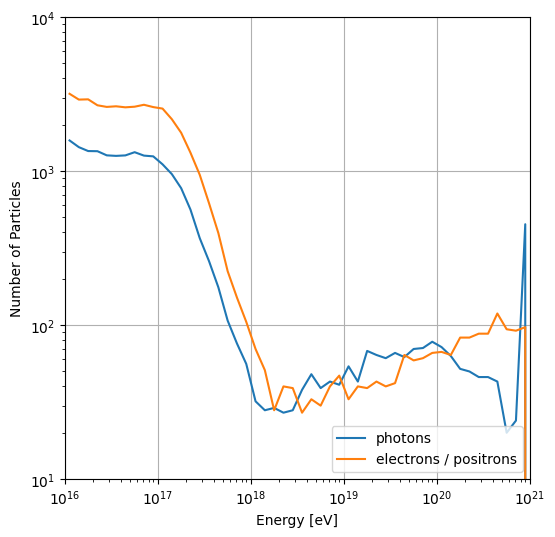

In [2]:
%matplotlib inline
from pylab import *

t.close()
figure(figsize=(6,6))

a = loadtxt("photon_electron_output.txt")
E = logspace(16,23,71)
idx = a[:,1] == 22
photons = a[idx,2] * 1e18
idx = fabs(a[:,1]) == 11
ep = a[idx,2] * 1e18
data,bins = histogram(photons,E)
bincenter = (E[1:] -E[:-1])/2 + E[:-1]
plot(bincenter, data,label="photons")
data,bins = histogram(ep,E)
plot(bincenter, data, label="electrons / positrons")
grid()
loglog()
xlim(1e16, 1e21)
ylim(1e1, 1e4)
legend(loc="lower right")
xlabel("Energy [eV]")
ylabel("Number of Particles")
show()